In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [111]:
pd.set_option('max_columns', None)

In [112]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [113]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [114]:
train.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
500,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,285.0,TA,TA,CBlock,TA,TA,No,BLQ,356,Unf,0,316,672,GasA,TA,Y,SBrkr,672,546,0,1218,0,0,1,1,3,1,TA,7,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,144,28,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,113000
503,20,RL,100.0,15602,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,7,8,1959,1997,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1247,Unf,0,254,1501,GasA,TA,Y,SBrkr,1801,0,0,1801,1,0,2,0,1,1,TA,6,Typ,2,TA,Attchd,1959.0,Fin,2,484,TA,TA,Y,0,54,0,0,161,0,NaN,GdWo,NaN,0,3,2010,WD,Normal,289000
859,60,RL,NaN,11029,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosA,Norm,1Fam,2Story,6,7,1968,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,220.0,TA,TA,CBlock,TA,TA,Mn,BLQ,619,Unf,0,435,1054,GasA,TA,Y,SBrkr,1512,1142,0,2654,1,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1968.0,Unf,2,619,TA,TA,Y,0,65,0,0,222,0,NaN,NaN,NaN,0,8,2006,WD,Normal,250000


In [115]:
num_feature = train.select_dtypes(np.number)

In [116]:
num_feature.shape

(1460, 37)

In [117]:
num_feature.nunique().sort_values()

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

In [118]:
exp = [i for i in num_feature.columns if num_feature[i].nunique()<25 ]

In [119]:
exp1 = [i for i in num_feature.columns if num_feature[i].nunique()>25 ]

In [120]:
train[exp]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8,2007
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2,2010
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5,2010
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4,2010


In [121]:
train[exp1]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,1647,1999.0,460,0,40,0,0,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,2073,1978.0,500,349,0,0,0,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,2340,1941.0,252,0,60,0,0,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,1078,1950.0,240,366,0,112,0,142125


In [122]:
train[exp1].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
BsmtFinSF2      -0.011378
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

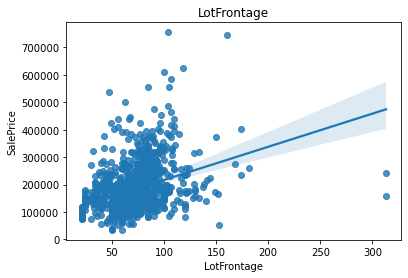

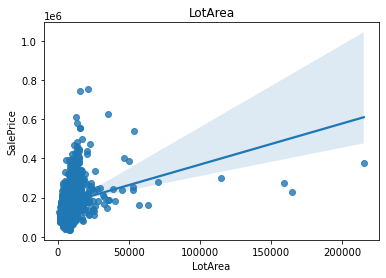

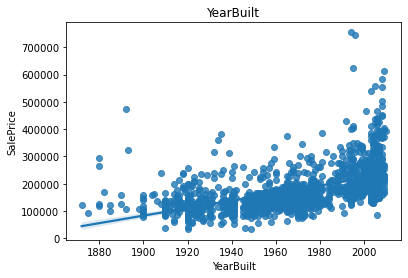

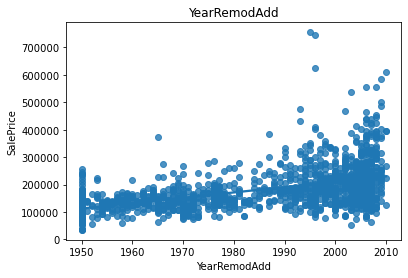

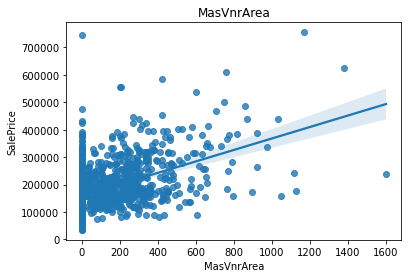

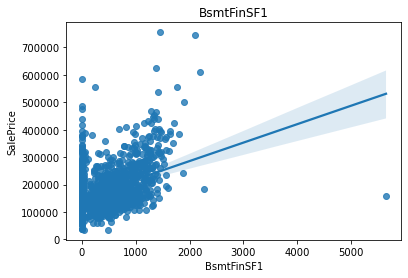

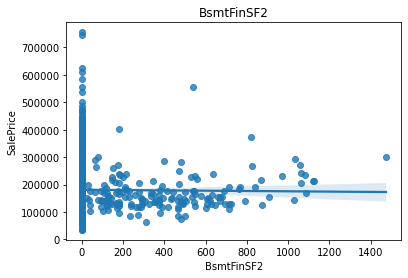

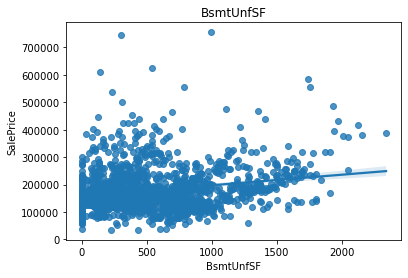

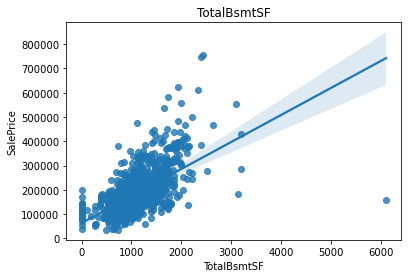

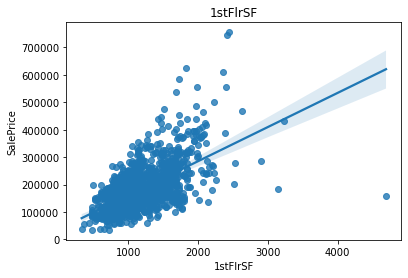

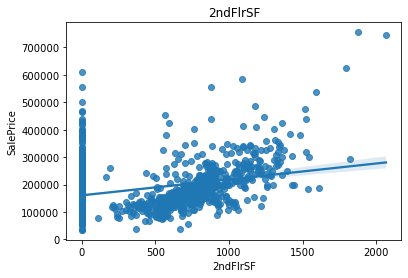

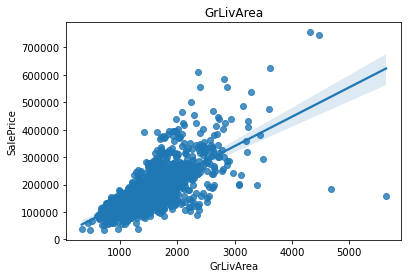

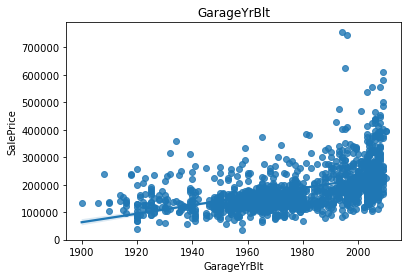

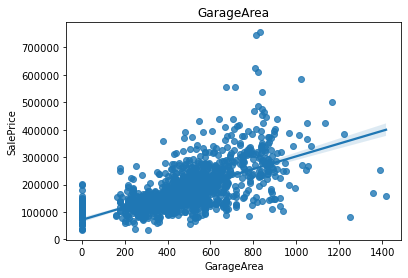

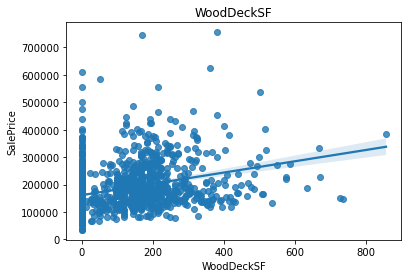

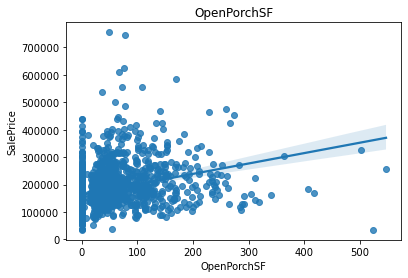

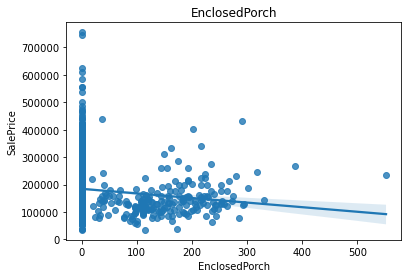

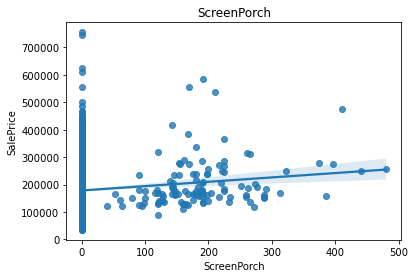

In [123]:
for i in exp1:
    if i == 'SalePrice':
        pass
    else:
        sns.regplot(x = i, y='SalePrice', data=train)
        plt.title(i)
        plt.show()

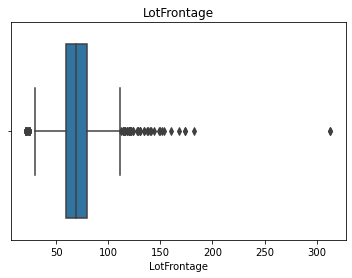

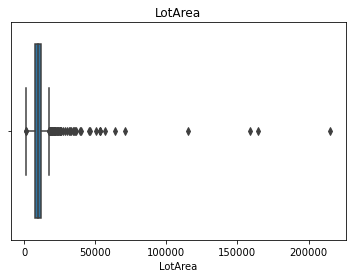

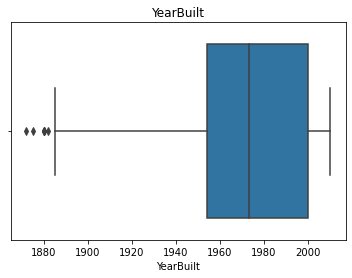

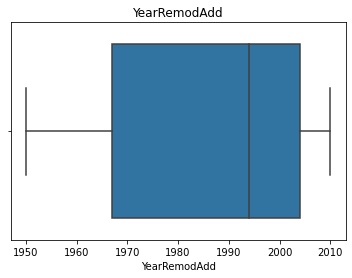

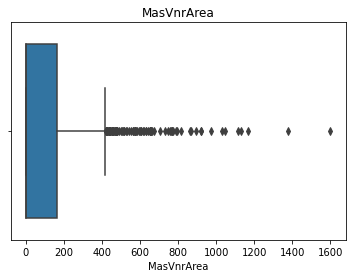

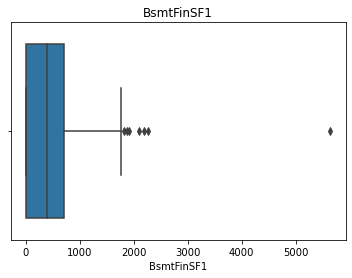

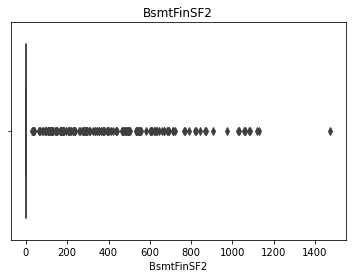

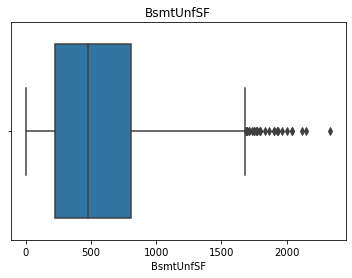

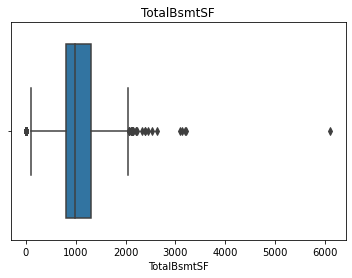

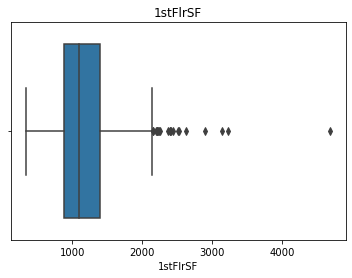

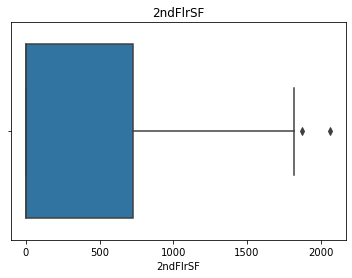

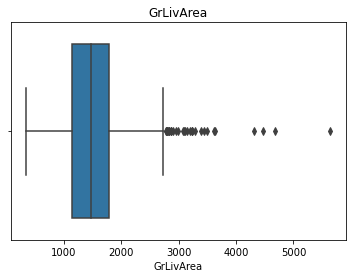

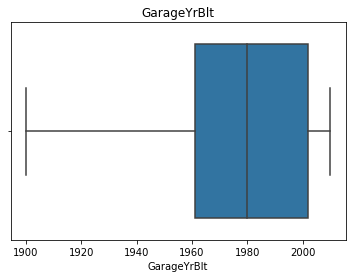

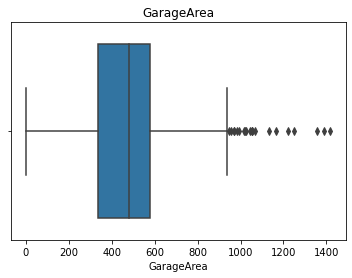

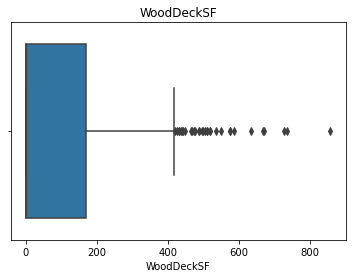

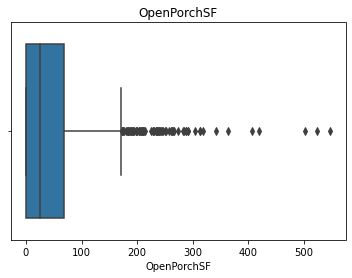

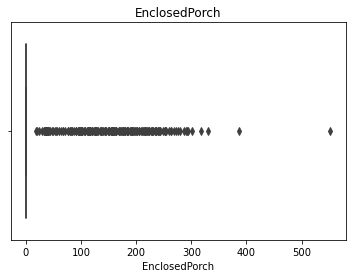

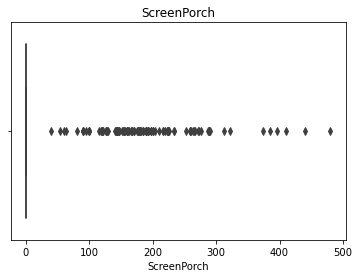

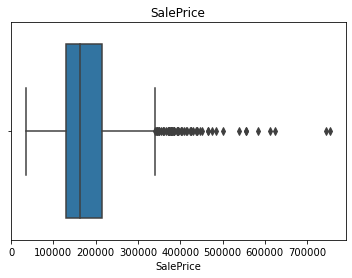

In [56]:
for i in exp1:
    sns.boxplot(x=i,data=train)
    plt.title(i)
    plt.show()

In [124]:
train.LotFrontage.quantile(0.25)

59.0

In [125]:
train.LotFrontage.quantile(0.75)

80.0

In [127]:
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr
    data = np.where(data > upper_lim, upper_lim,
                   np.where(data < low_lim, low_lim, data))
    return data

In [128]:
for i in exp1:
    train[i] = outliers(train[i])

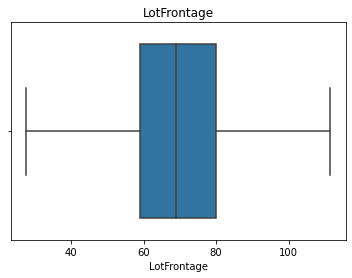

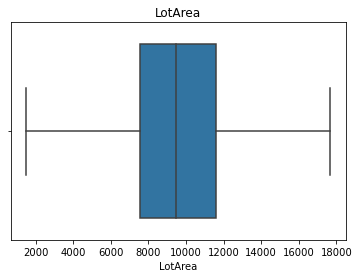

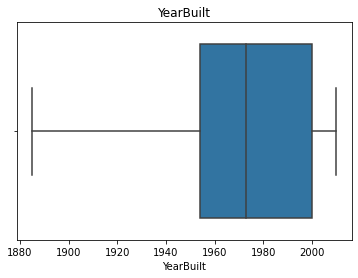

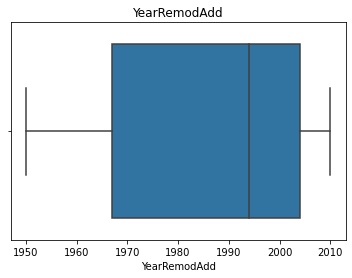

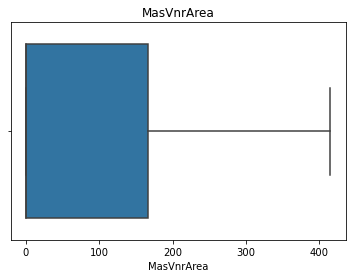

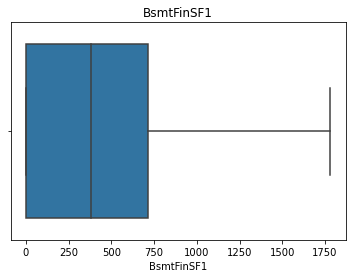

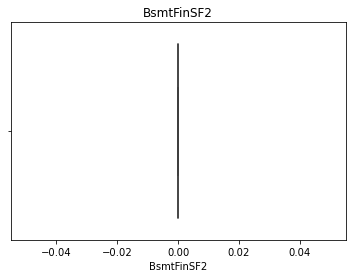

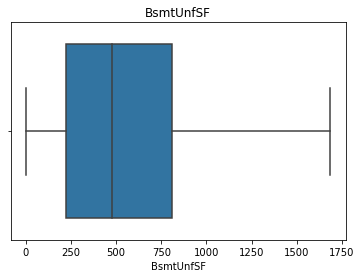

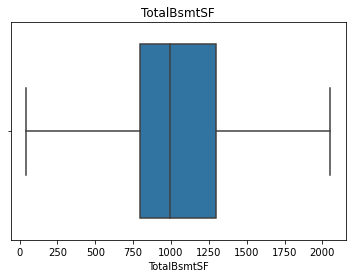

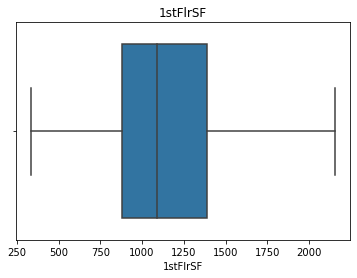

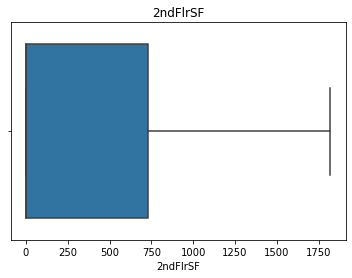

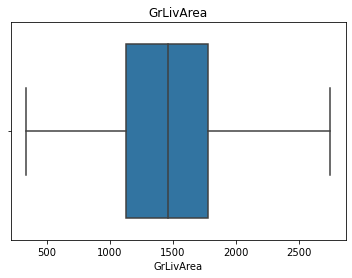

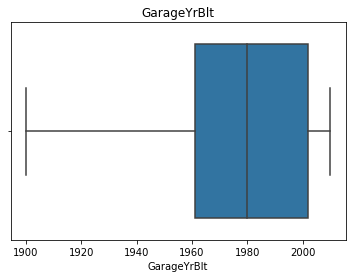

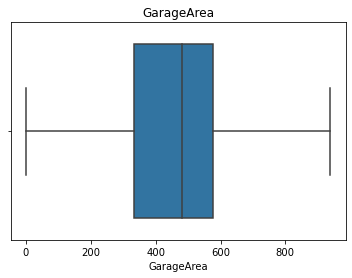

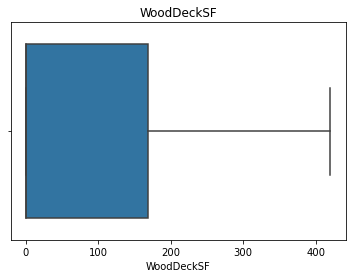

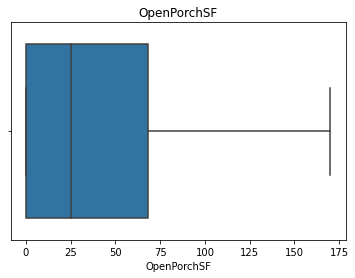

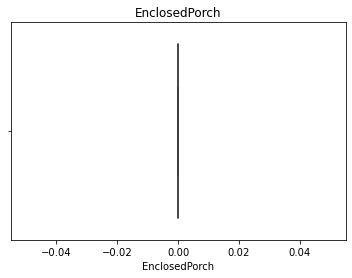

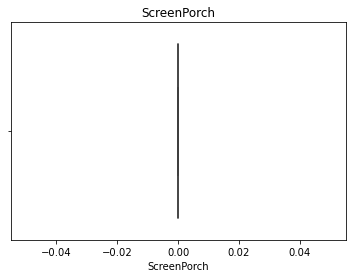

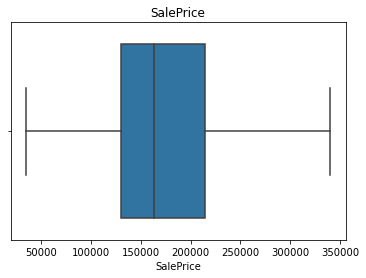

In [129]:
for i in exp1:
    sns.boxplot(x=i,data=train)
    plt.title(i)
    plt.show()

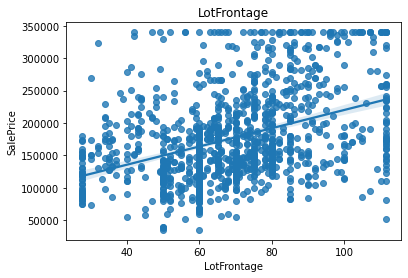

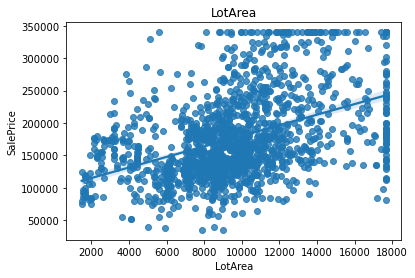

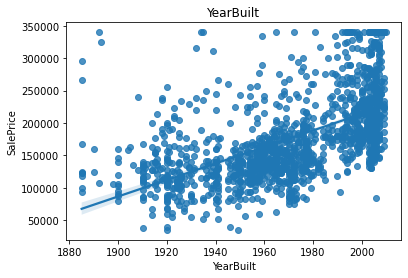

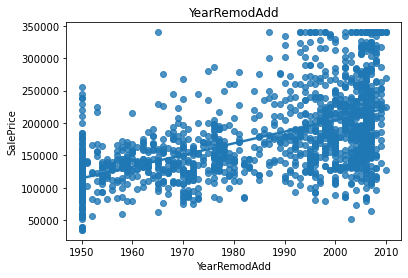

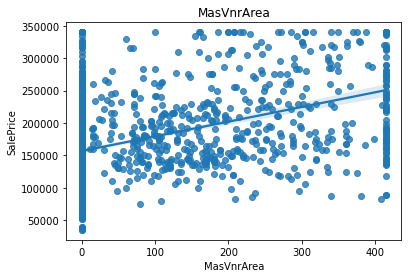

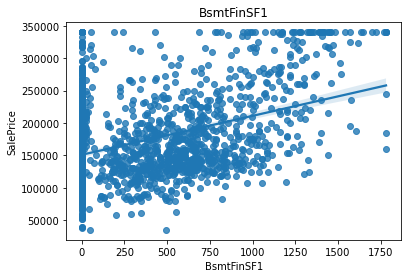

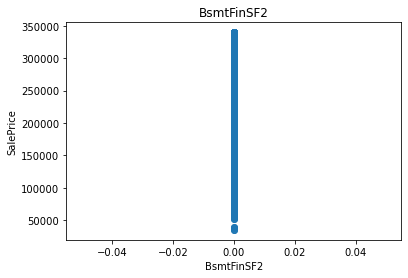

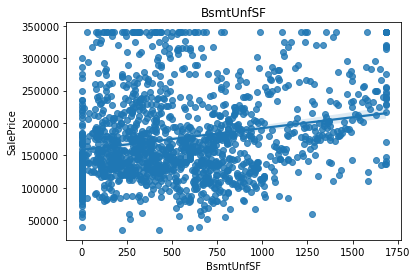

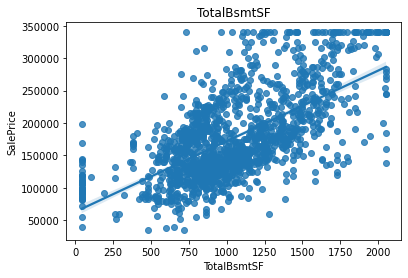

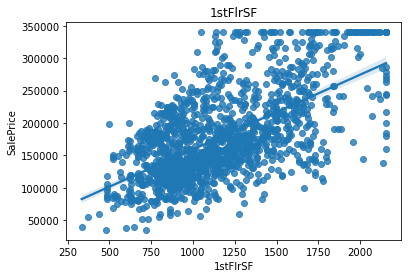

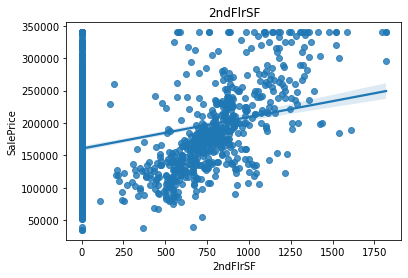

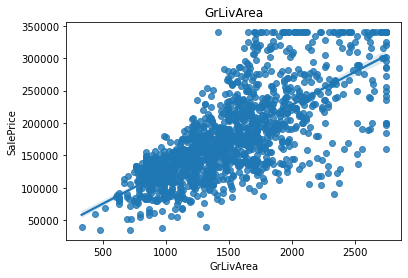

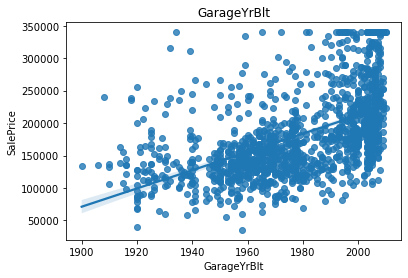

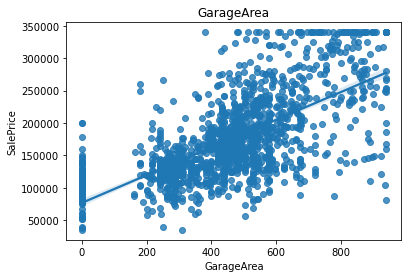

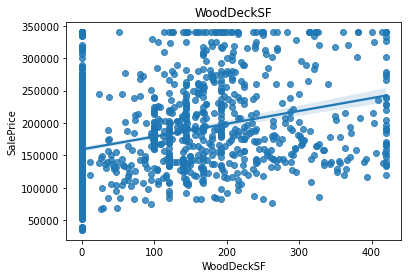

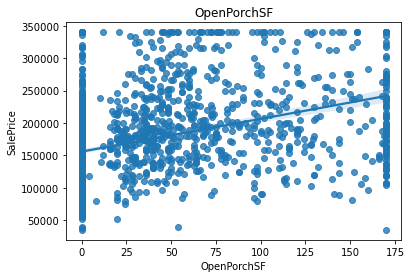

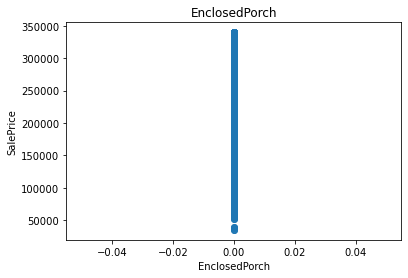

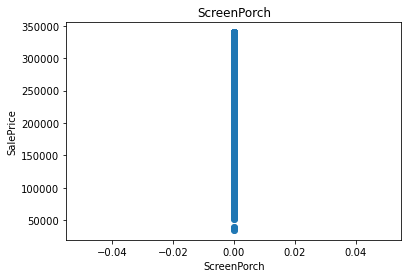

In [130]:
for i in exp1:
    if i == 'SalePrice':
        pass
    else:
        sns.regplot(x = i, y='SalePrice', data=train)
        plt.title(i)
        plt.show()

In [131]:
train[exp1].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.729311
GarageArea       0.660029
TotalBsmtSF      0.645251
1stFlrSF         0.621873
YearBuilt        0.570327
YearRemodAdd     0.552061
GarageYrBlt      0.525632
MasVnrArea       0.455004
LotArea          0.435876
LotFrontage      0.397253
OpenPorchSF      0.394637
BsmtFinSF1       0.387586
WoodDeckSF       0.343660
2ndFlrSF         0.316508
BsmtUnfSF        0.216006
BsmtFinSF2            NaN
EnclosedPorch         NaN
ScreenPorch           NaN
Name: SalePrice, dtype: float64

In [132]:
train[num_feature.columns].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.816856
GrLivArea        0.729311
GarageCars       0.672293
GarageArea       0.660029
TotalBsmtSF      0.645251
1stFlrSF         0.621873
FullBath         0.583994
YearBuilt        0.570327
YearRemodAdd     0.552061
TotRmsAbvGrd     0.529719
GarageYrBlt      0.525632
Fireplaces       0.486687
MasVnrArea       0.455004
LotArea          0.435876
LotFrontage      0.397253
OpenPorchSF      0.394637
BsmtFinSF1       0.387586
WoodDeckSF       0.343660
2ndFlrSF         0.316508
HalfBath         0.295110
BsmtFullBath     0.239649
BsmtUnfSF        0.216006
BedroomAbvGr     0.181281
MoSold           0.068075
PoolArea         0.055847
3SsnPorch        0.050353
MiscVal         -0.020362
BsmtHalfBath    -0.026997
YrSold          -0.031358
LowQualFinSF    -0.040036
OverallCond     -0.075123
MSSubClass      -0.085170
KitchenAbvGr    -0.149355
BsmtFinSF2            NaN
EnclosedPorch         NaN
ScreenPorch           NaN
Name: SalePrice, dtype: float64

In [135]:
train[num_feature.columns].skew()

MSSubClass        1.407657
LotFrontage       0.090295
LotArea           0.208492
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.594020
YearRemodAdd     -0.503562
MasVnrArea        1.290554
BsmtFinSF1        0.739877
BsmtFinSF2        0.000000
BsmtUnfSF         0.796931
TotalBsmtSF       0.237240
1stFlrSF          0.664134
2ndFlrSF          0.800109
LowQualFinSF      9.011341
GrLivArea         0.593556
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea       -0.069685
WoodDeckSF        1.083673
OpenPorchSF       1.136301
EnclosedPorch     0.000000
3SsnPorch        10.304342
ScreenPorch       0.000000
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         0.802786
d

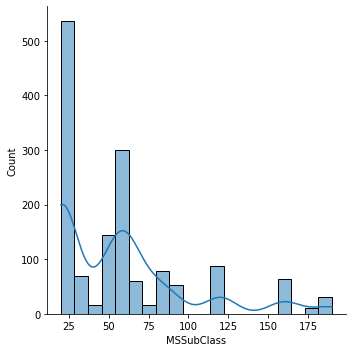

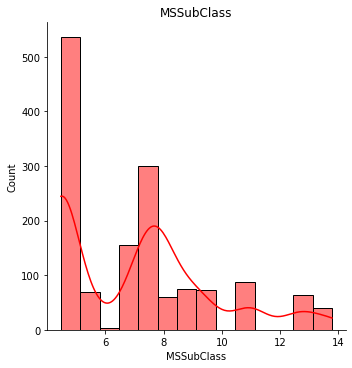

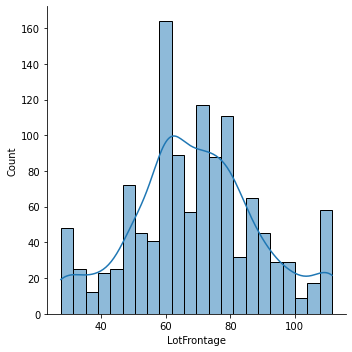

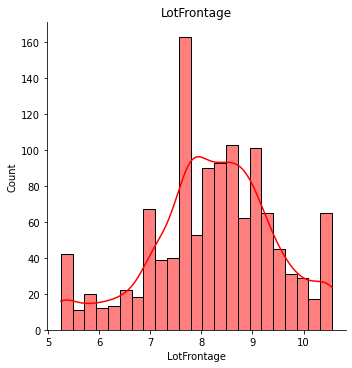

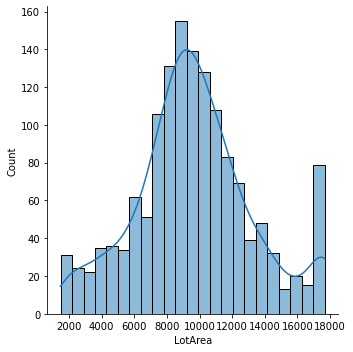

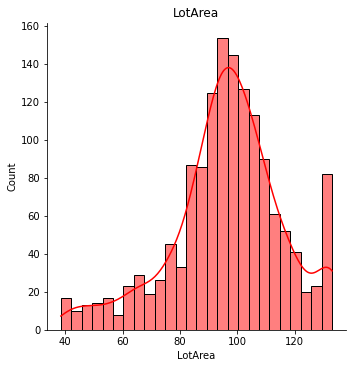

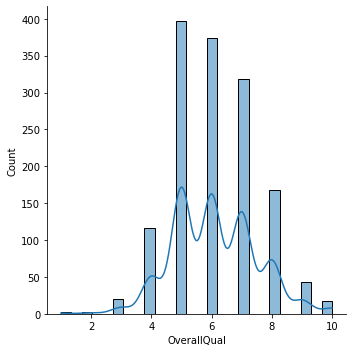

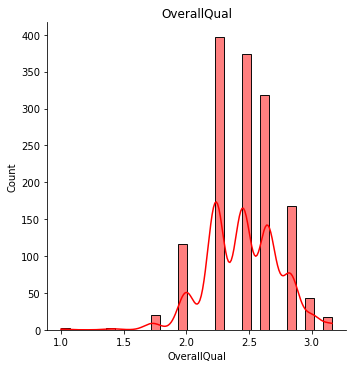

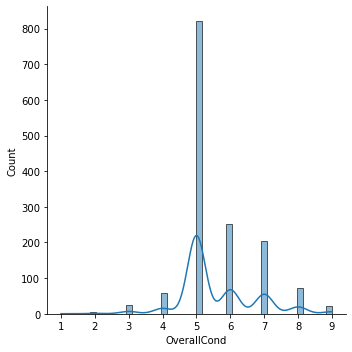

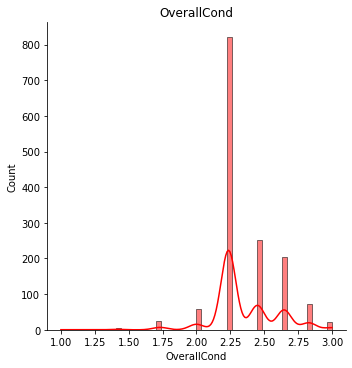

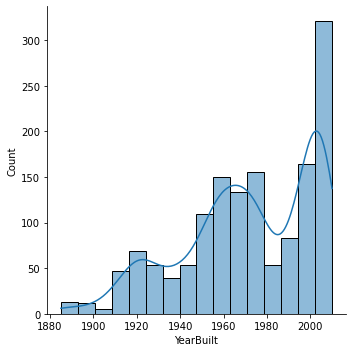

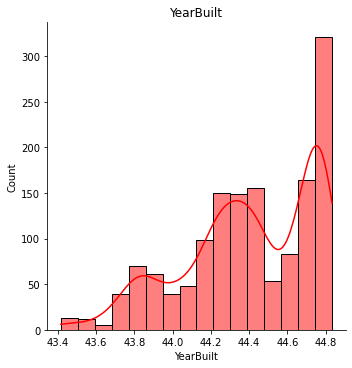

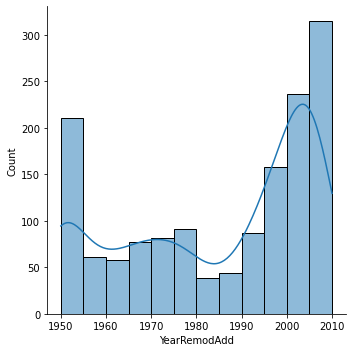

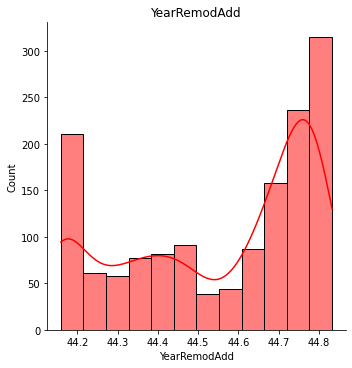

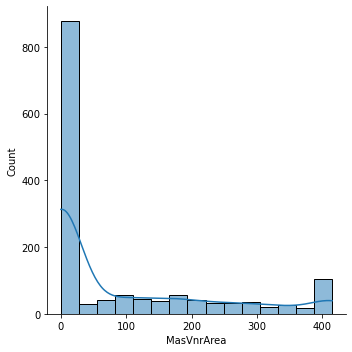

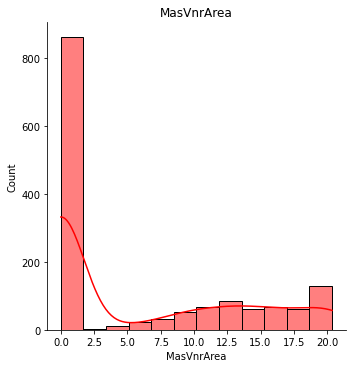

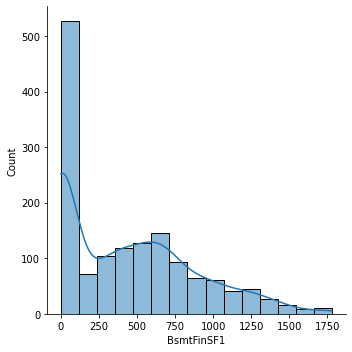

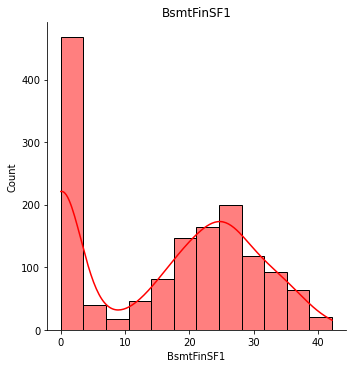

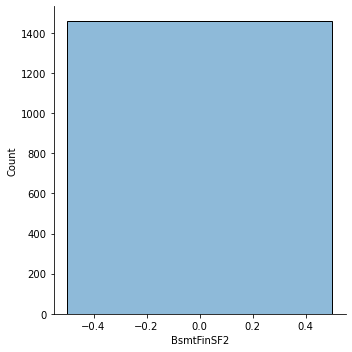

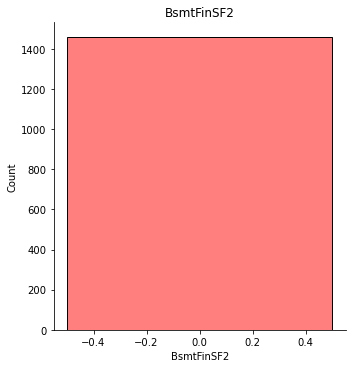

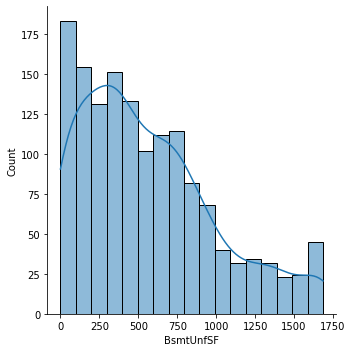

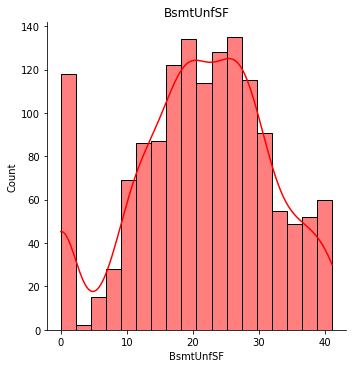

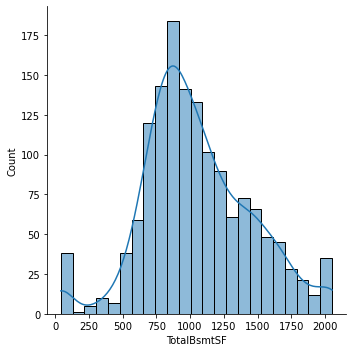

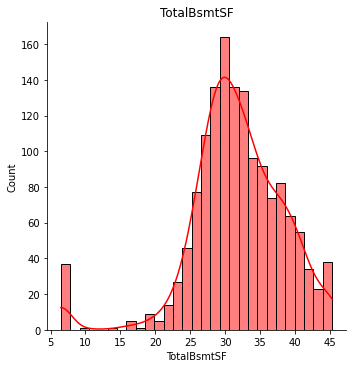

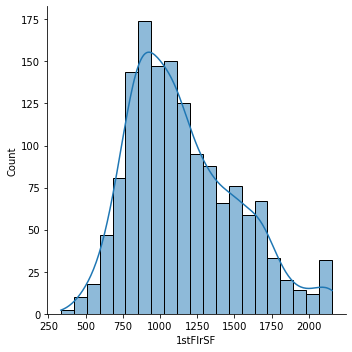

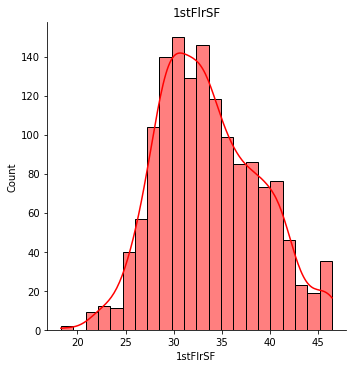

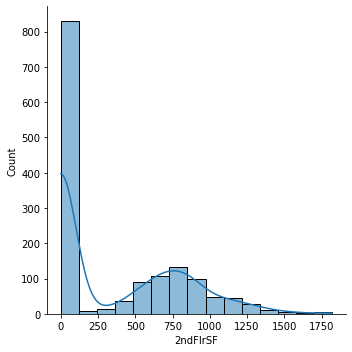

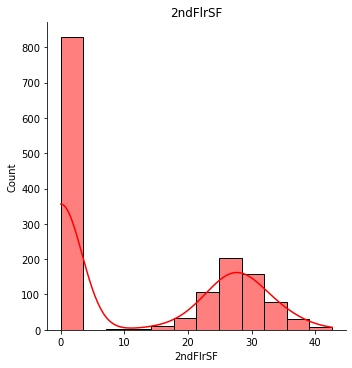

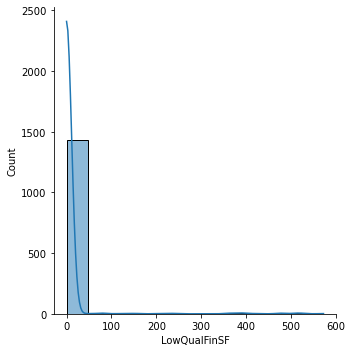

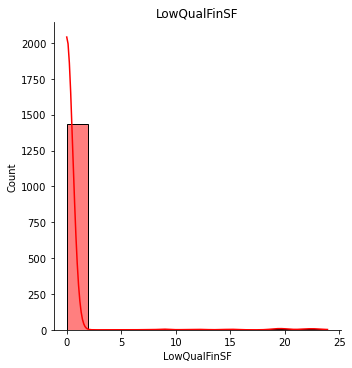

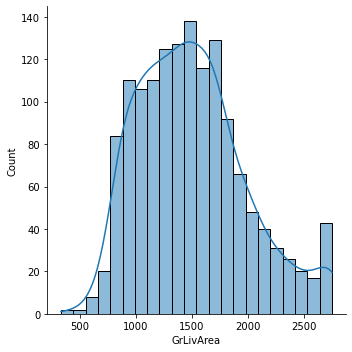

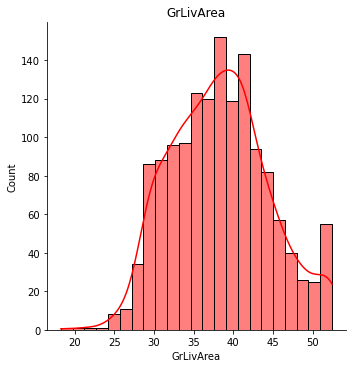

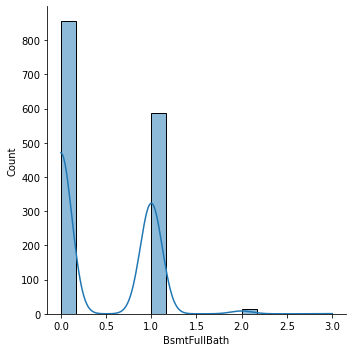

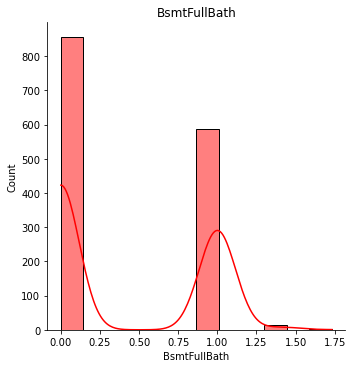

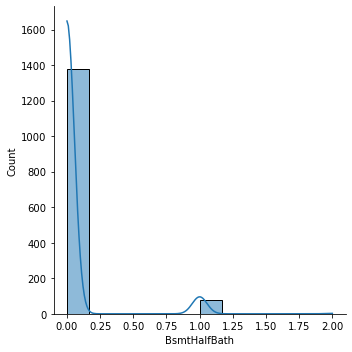

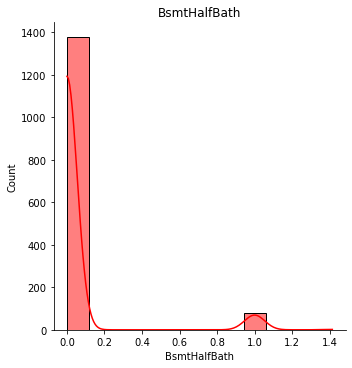

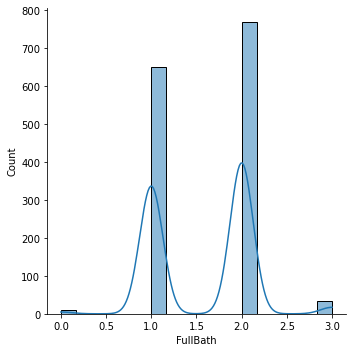

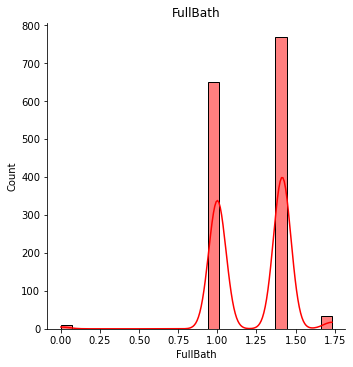

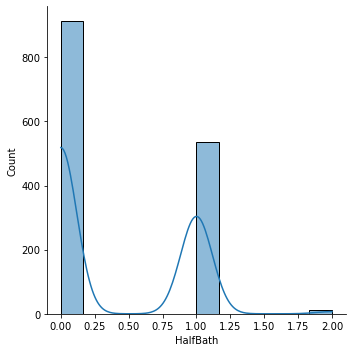

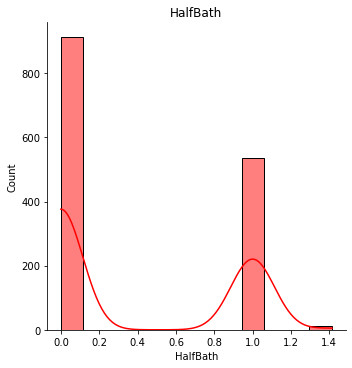

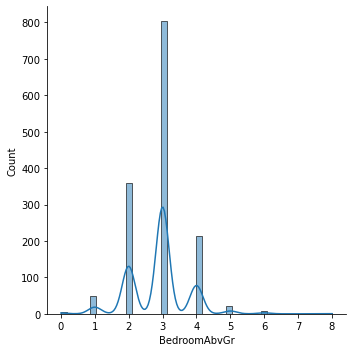

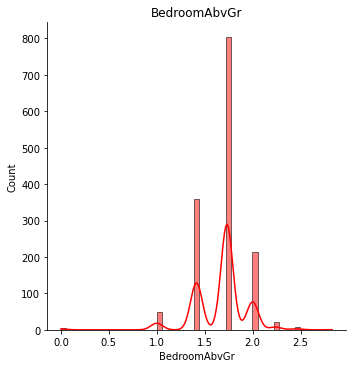

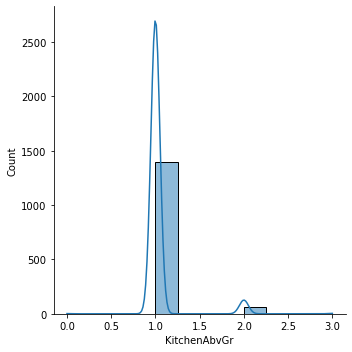

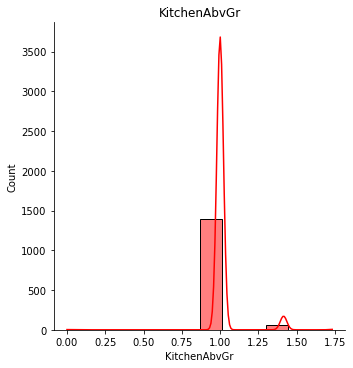

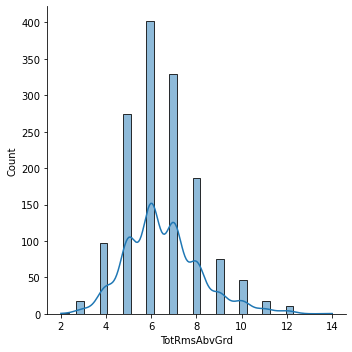

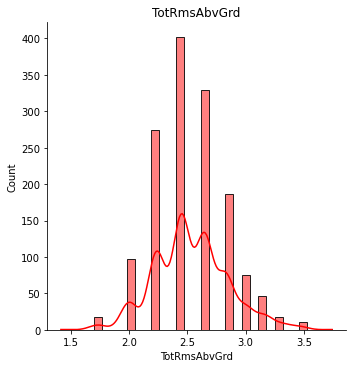

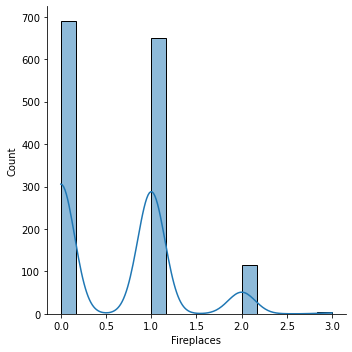

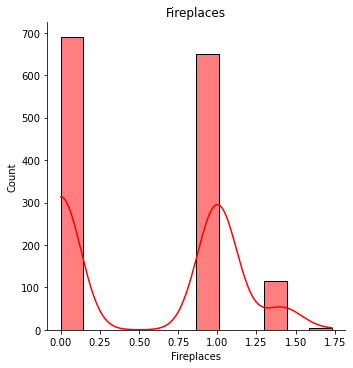

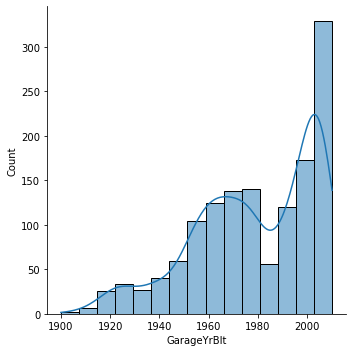

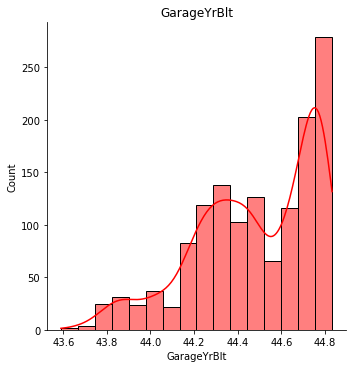

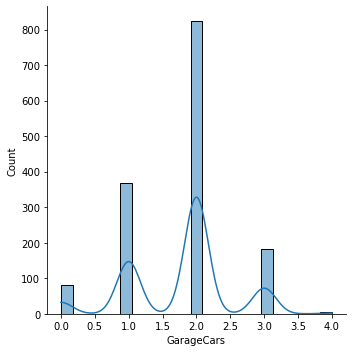

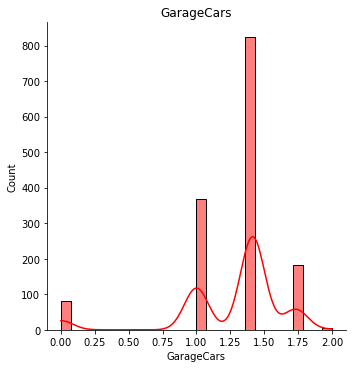

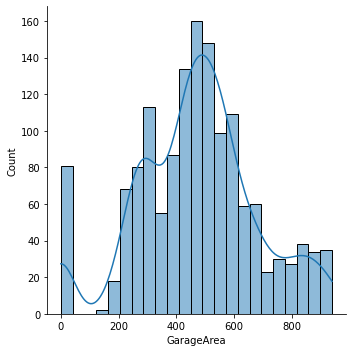

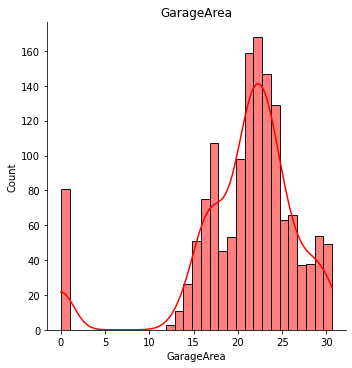

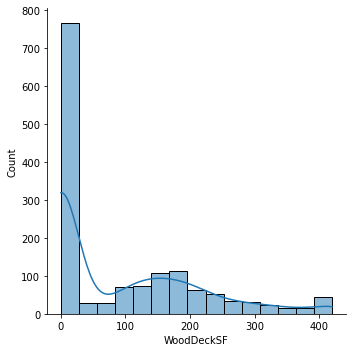

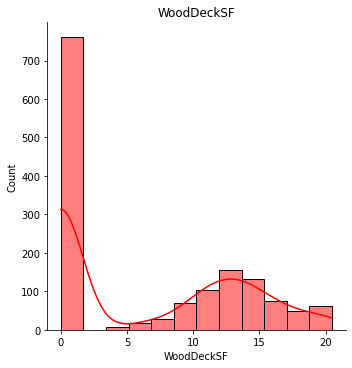

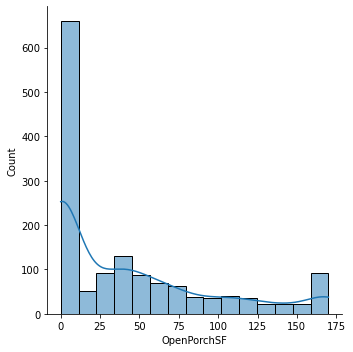

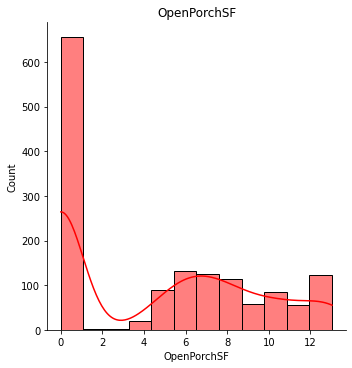

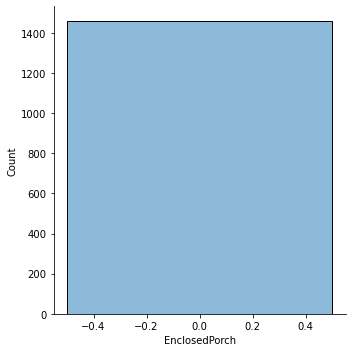

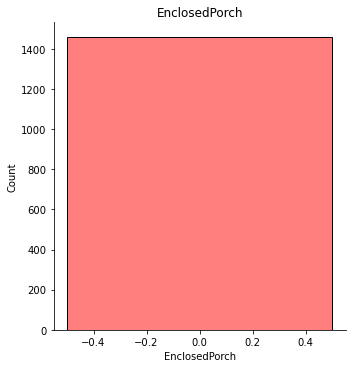

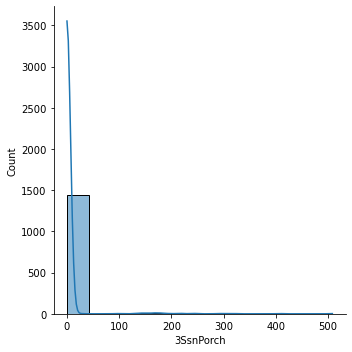

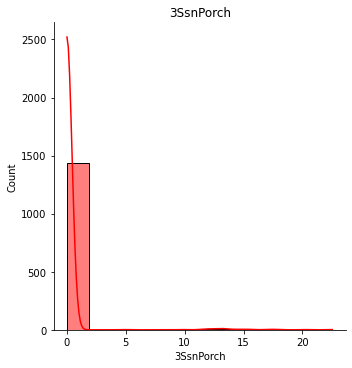

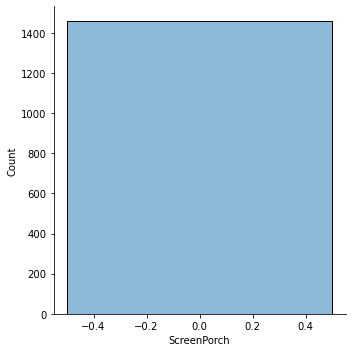

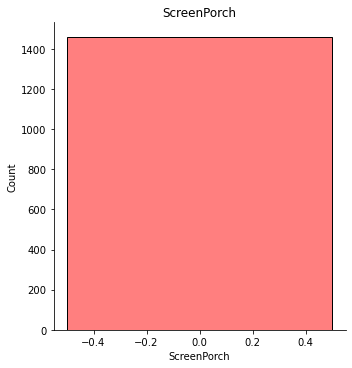

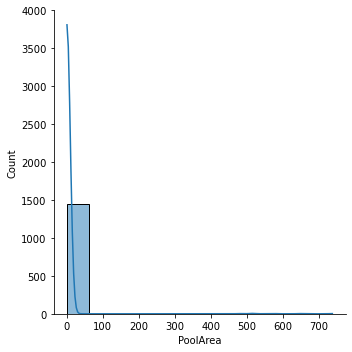

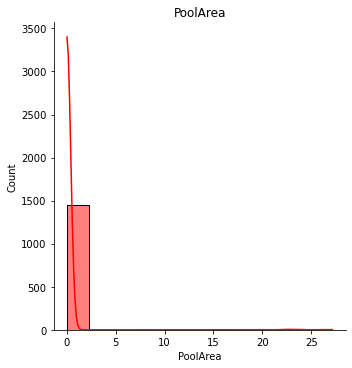

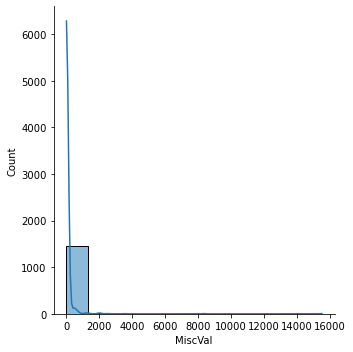

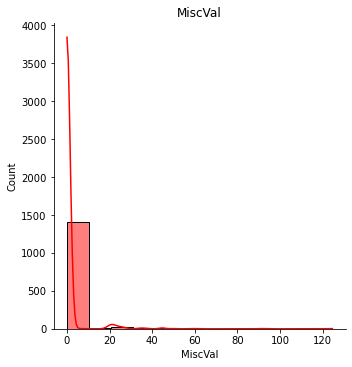

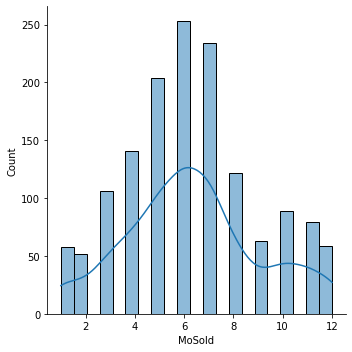

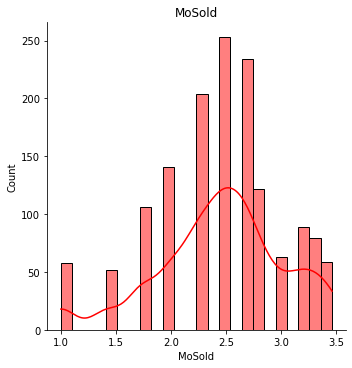

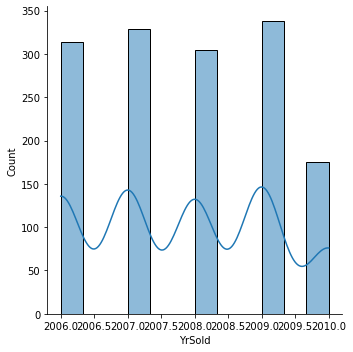

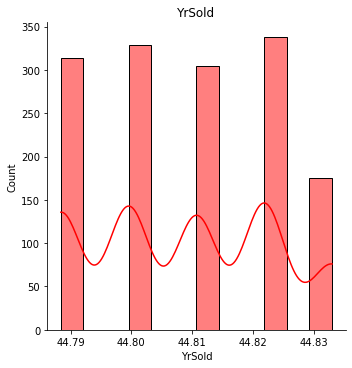

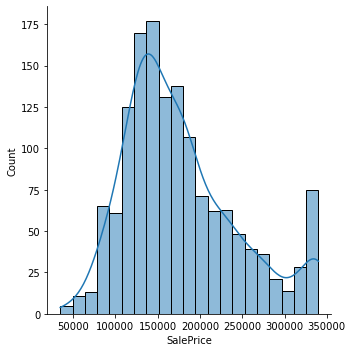

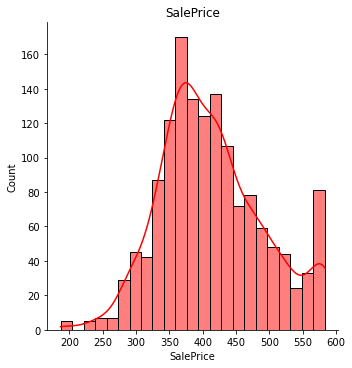

In [138]:
for i in num_feature.columns:
    sns.displot(train[i], kde=True)
    sns.displot(np.sqrt(train[i]), kde=True, color = 'red')
    plt.title(i)
    plt.show()

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scale = MinMaxScaler()

In [144]:
scale.fit(train[num_feature.columns])

MinMaxScaler()

In [145]:
scaled = scale.transform(train[num_feature.columns])

In [146]:
scaled = pd.DataFrame(scaled, columns= num_feature.columns)

In [147]:
scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.446429,0.430367,0.666667,0.500,0.944,0.883333,0.472289,0.396490,0.0,0.088994,0.404975,0.286636,0.469231,0.0,0.570097,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.584066,0.000000,0.358824,0.0,0.0,0.0,0.0,0.00000,0.090909,0.50,0.568924
1,0.000000,0.625000,0.501390,0.555556,0.875,0.728,0.433333,0.000000,0.549245,0.0,0.168496,0.606965,0.509575,0.000000,0.0,0.384484,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.490274,0.709524,0.000000,0.0,0.0,0.0,0.0,0.00000,0.363636,0.25,0.480439
2,0.235294,0.482143,0.603292,0.666667,0.500,0.928,0.866667,0.390361,0.272938,0.0,0.257490,0.436816,0.321779,0.475824,0.0,0.601585,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.648015,0.000000,0.247059,0.0,0.0,0.0,0.0,0.00000,0.727273,0.50,0.618082
3,0.294118,0.386905,0.498302,0.666667,0.500,0.240,0.333333,0.000000,0.121306,0.0,0.320380,0.355224,0.344293,0.415385,0.0,0.572997,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.684253,0.000000,0.205882,0.0,0.0,0.0,0.0,0.00000,0.090909,0.00,0.344435
4,0.235294,0.672619,0.789186,0.777778,0.500,0.920,0.833333,0.843373,0.367848,0.0,0.290715,0.548756,0.445329,0.578571,0.0,0.772282,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.891021,0.457143,0.494118,0.0,0.0,0.0,0.0,0.00000,1.000000,0.50,0.704928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.410714,0.397449,0.555556,0.500,0.912,0.833333,0.000000,0.000000,0.0,0.565411,0.453234,0.339900,0.381319,0.0,0.543995,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.900000,0.50,0.490274,0.000000,0.235294,0.0,0.0,0.0,0.0,0.00000,0.636364,0.25,0.459137
1456,0.000000,0.684524,0.722178,0.555556,0.625,0.744,0.633333,0.286747,0.443664,0.0,0.349451,0.746269,0.954904,0.000000,0.0,0.720493,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.666667,0.709091,0.50,0.532907,0.830952,0.000000,0.0,0.0,0.0,0.0,0.00000,0.090909,1.00,0.573840
1457,0.294118,0.458333,0.466928,0.666667,1.000,0.448,0.933333,0.000000,0.154440,0.0,0.520320,0.552239,0.468941,0.632967,0.0,0.831115,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.583333,0.666667,0.372727,0.25,0.268585,0.000000,0.352941,0.0,0.0,0.0,0.0,0.16129,0.363636,1.00,0.759002
1458,0.000000,0.482143,0.508615,0.444444,0.625,0.520,0.766667,0.000000,0.027518,0.0,0.000000,0.515423,0.408539,0.000000,0.0,0.308250,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.000000,0.454545,0.25,0.255795,0.871429,0.000000,0.0,0.0,0.0,0.0,0.00000,0.272727,1.00,0.351399


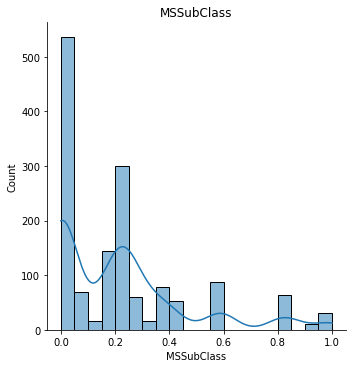

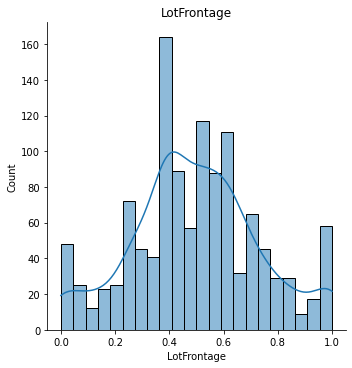

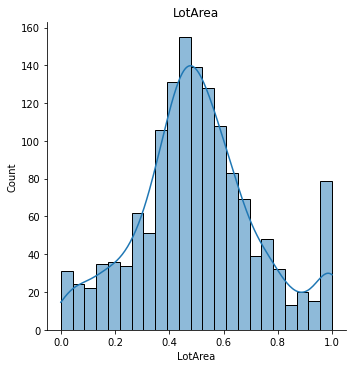

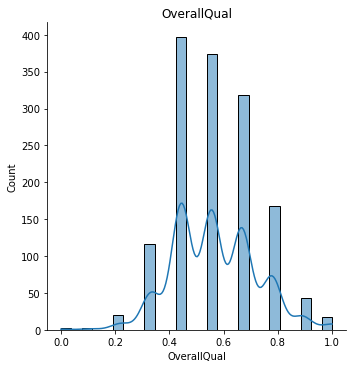

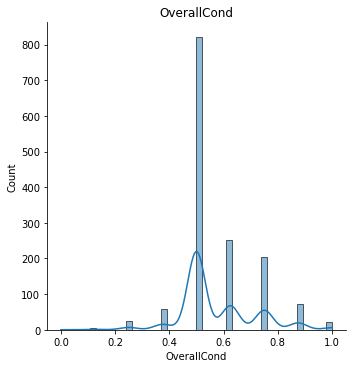

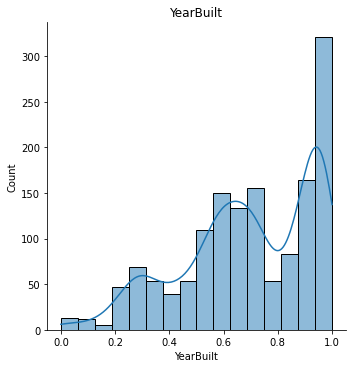

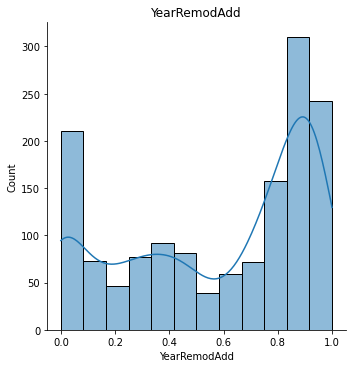

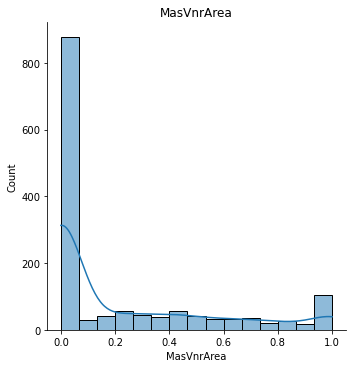

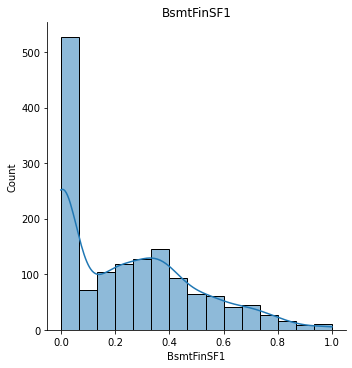

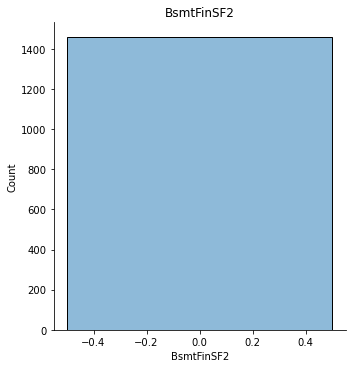

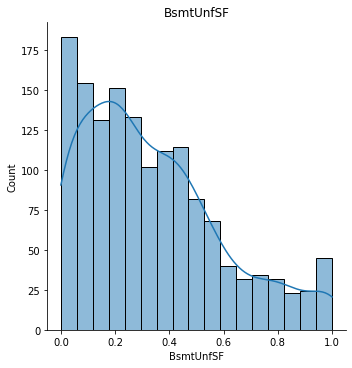

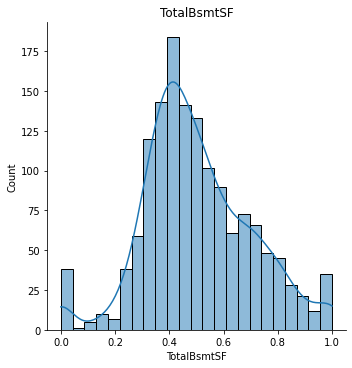

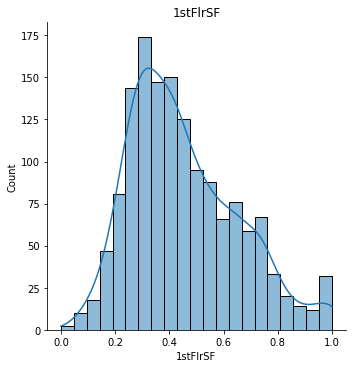

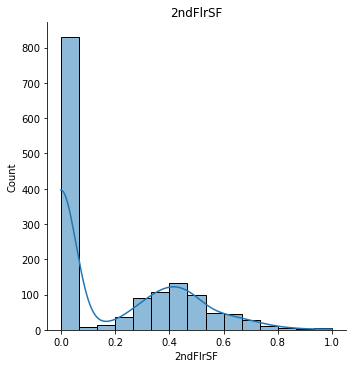

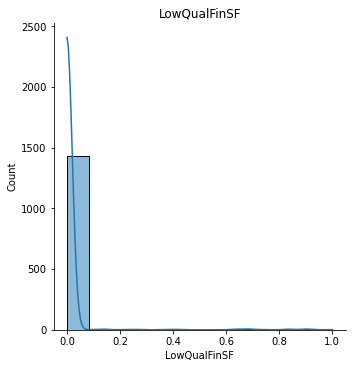

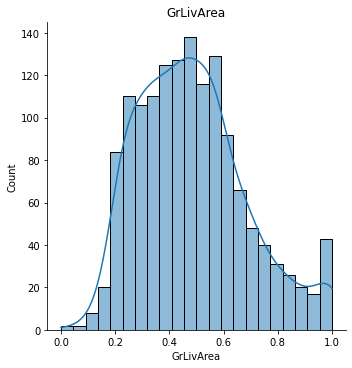

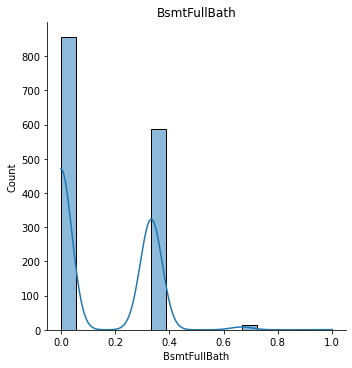

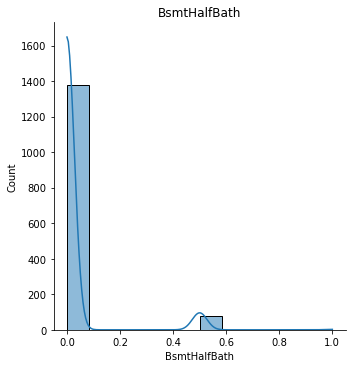

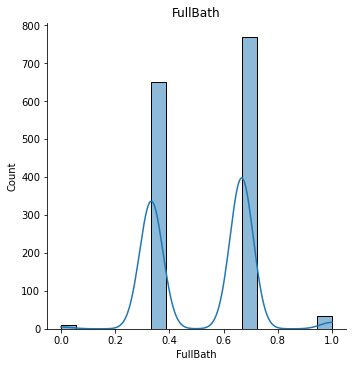

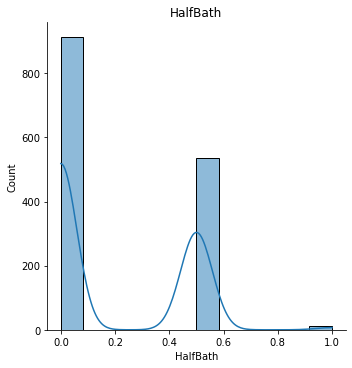

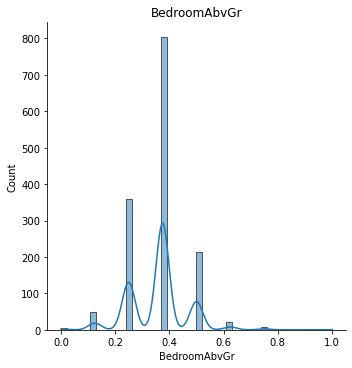

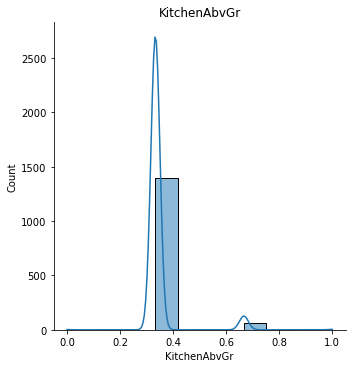

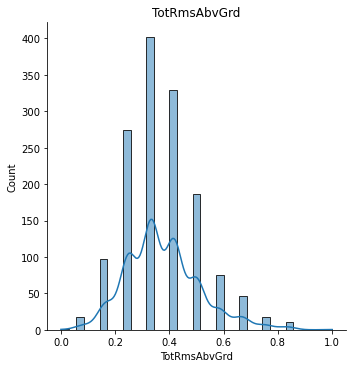

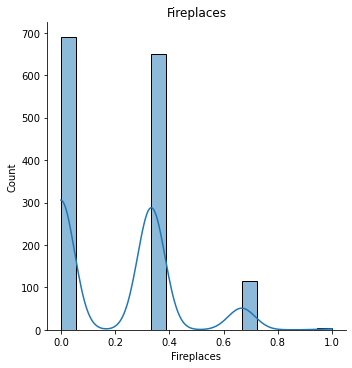

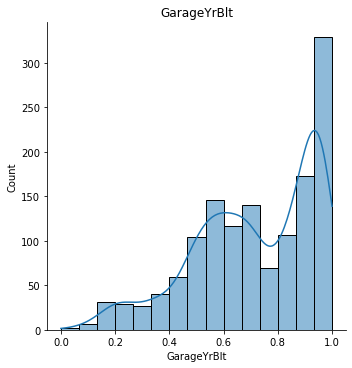

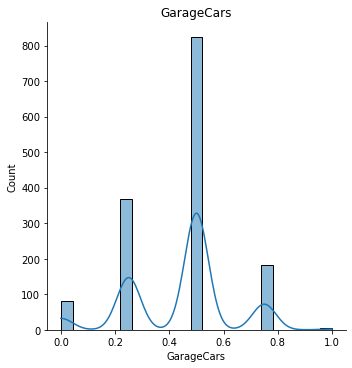

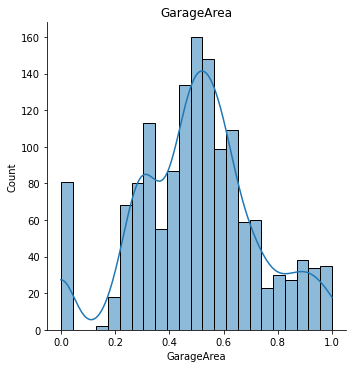

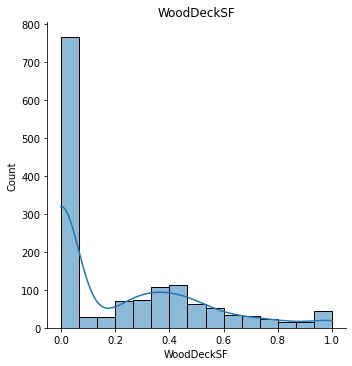

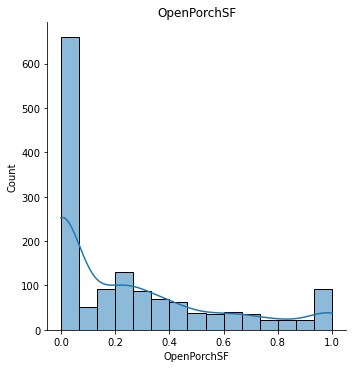

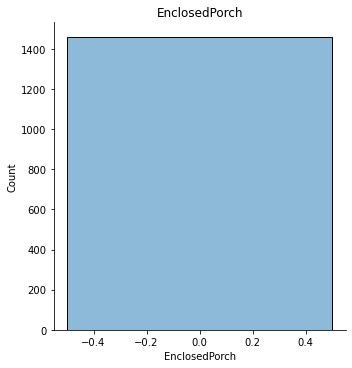

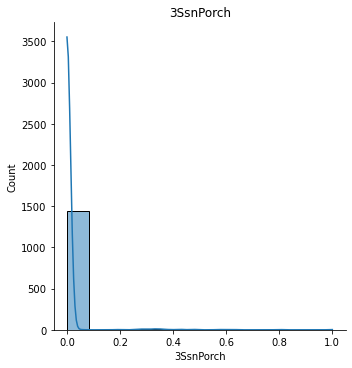

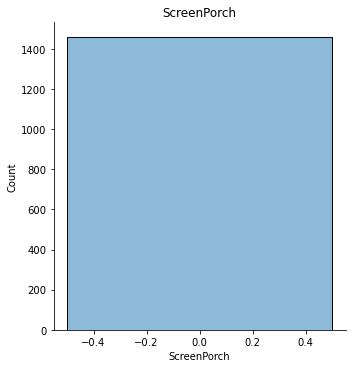

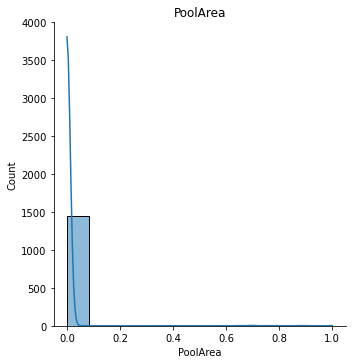

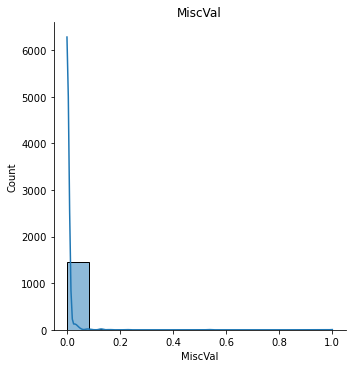

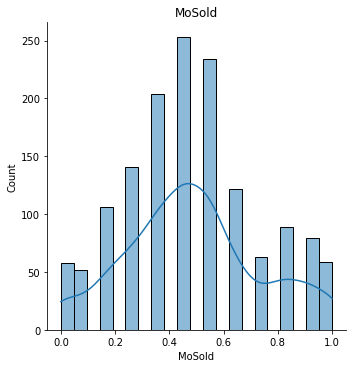

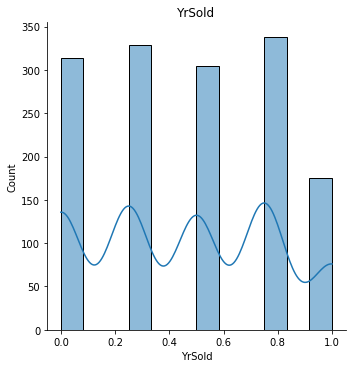

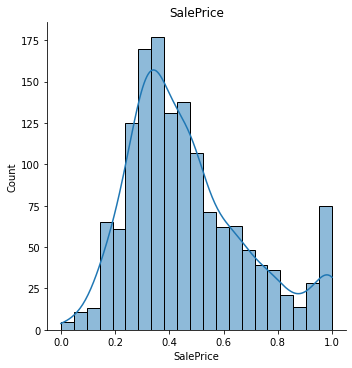

In [149]:
for i in scaled.columns:
    sns.displot(scaled[i], kde=True)
    plt.title(i)
    plt.show()

In [150]:
categorical_features = train.select_dtypes(include='object').columns

In [154]:
train[categorical_features]= train[categorical_features].fillna('Missing')

In [155]:
train[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1456,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1457,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [162]:
df = pd.read_csv('ft_train.csv')

In [163]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,16,4,4,4,6,7,5,2003,2003,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,3,0,2,2008,4,4,208500,0,0,0
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,20,2,4,4,5,6,8,1976,1976,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,3,5,1976.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,3,0,5,2007,4,4,181500,0,0,0
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,16,4,4,4,6,7,5,2001,2002,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,3,0,9,2008,4,4,223500,0,0,0
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,17,4,4,4,6,7,5,1915,1970,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,3,0,2,2006,4,1,140000,0,0,0
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,24,4,4,4,6,8,5,2000,2000,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,3,0,12,2008,4,4,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,0,1,1,0,0,14,4,4,4,6,6,5,1999,2000,1,2,11,12,1,0.0,1,3,5,3,3,1,5,0,5,0,953,953,5,4,1,5,953,694,0,1647,0,0,2,1,3,1,1,7,6,1,3,5,1999.0,2,2,460,3,5,2,0,40,0,0,0,0,0,4,3,0,8,2007,4,4,175000,0,0,0
1456,1457,20,3,85.0,13175,1,2,0,1,1,0,0,13,4,4,4,5,6,6,1978,1988,1,2,9,10,4,119.0,1,3,2,3,3,1,4,790,3,163,589,1542,5,2,1,5,2073,0,0,2073,1,0,2,0,3,1,1,7,3,2,3,5,1978.0,1,2,500,3,5,2,349,0,0,0,0,0,0,2,3,0,2,2010,4,4,210000,0,0,0
1457,1458,70,3,66.0,9042,1,2,0,1,1,0,0,17,4,4,4,6,7,9,1941,2006,1,2,12,13,1,0.0,3,2,3,2,4,1,6,275,5,0,877,1152,5,4,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,4,5,1941.0,2,1,252,3,5,2,0,60,0,0,0,0,0,3,1,2500,5,2010,4,4,266500,0,0,0
1458,1459,20,3,68.0,9717,1,2,0,1,1,0,0,10,4,4,4,5,5,6,1950,1996,4,2,4,5,1,0.0,1,3,2,2,3,2,6,49,3,1029,0,1078,5,3,1,3,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,5,1950.0,1,1,240,3,5,2,366,0,112,0,0,0,0,4,3,0,4,2010,4,4,142125,0,0,0


In [173]:
df[exp1].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,1978.589041,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,23.997022,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


In [174]:
train[exp1] = train[exp1].fillna(train[exp1].median())

In [175]:
train[exp1].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.000000
mean,69.110959,9647.388014,1971.299315,1984.865753,89.697945,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,1503.735873,1978.589041,470.670719,91.806849,42.603425,0.0,0.0,177331.526370
std,17.831709,3594.356399,30.108397,20.645407,134.719570,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,481.375641,23.997022,207.105729,116.658120,52.501584,0.0,0.0,67205.835915
min,27.500000,1481.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.0,0.0,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,1129.500000,1962.000000,334.500000,0.000000,0.000000,0.0,0.0,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.0,0.0,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2001.000000,576.000000,168.000000,68.000000,0.0,0.0,214000.000000
max,111.500000,17673.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,2747.625000,2010.000000,938.250000,420.000000,170.000000,0.0,0.0,340037.500000


In [176]:
df[exp1] = train[exp1]

In [177]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
666,667,60,3,69.0,17673.5,1,2,1,1,1,0,0,10,4,4,4,6,6,5,1965.0,1979.0,3,4,9,10,0,113.0,1,2,2,3,3,1,3,187.0,3,0.0,111.0,1021.0,5,2,1,5,1465.0,915.0,0,2380.0,0,0,2,1,3,1,1,7,1,1,0,1,1965.0,1,2,596.0,3,5,2,0.0,170.0,0.0,0,0.0,0,0,4,3,0,8,2007,4,1,129000.0,1,0,0
1226,1227,60,3,86.0,14598.0,1,2,1,1,1,4,0,19,2,4,4,6,6,5,2007.0,2007.0,1,2,11,12,4,74.0,2,3,5,3,3,2,5,0.0,5,0.0,894.0,894.0,5,4,1,5,894.0,1039.0,0,1933.0,0,0,2,1,4,1,2,9,6,1,4,6,2007.0,3,3,668.0,3,5,2,100.0,18.0,0.0,0,0.0,0,0,4,3,0,1,2008,4,4,214000.0,0,0,0
196,197,20,3,79.0,9416.0,1,2,0,1,1,0,0,19,4,4,4,5,7,5,2007.0,2007.0,4,2,12,13,4,205.0,3,3,5,4,3,1,6,1126.0,5,0.0,600.0,1726.0,5,4,1,5,1726.0,0.0,0,1726.0,1,0,2,0,3,1,3,8,6,1,4,5,2007.0,3,3,786.0,3,5,2,171.0,138.0,0.0,0,0.0,0,0,4,3,0,9,2007,8,5,311872.0,0,0,0


In [179]:
y = df.SalePrice
x = df.drop('SalePrice', axis=1)

In [178]:
from sklearn.model_selection import train_test_split

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=56)

In [181]:
scaler = MinMaxScaler()

In [182]:
scaler.fit(x_train)

MinMaxScaler()

In [183]:
x_train = scaler.transform(x_train)

In [184]:
x_test = scaler.transform(x_test)

In [185]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
lr = LinearRegression()

In [188]:
lr.fit(x_train, y_train)

LinearRegression()

In [189]:
lr.score(x_train, y_train)

0.9261454697248861

In [191]:
lr.score(x_test, y_test)

0.8608869449459805

In [192]:
from sklearn.metrics import mean_squared_error

In [193]:
mean_squared_error(y_train, lr.predict(x_train))

0.01034213079303431

In [194]:
mean_squared_error(y_test, lr.predict(x_test))

0.021612370226327896

In [195]:
df1 = pd.read_csv('ft_train.csv')

In [196]:
df1[exp1] = train[exp1]

In [197]:
df1 = np.log1p(df1)

In [198]:
y = df1['SalePrice']
x= df1.drop('SalePrice', axis=1)

In [199]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.25, random_state=1)

In [200]:
lr.fit(x_train1, y_train1)

LinearRegression()

In [201]:
lr.score(x_train1, y_train1)

0.9155445370577812

In [202]:
lr.score(x_test1, y_test1)

0.8986919578946702

In [205]:
mean_squared_error(y_train1, lr.predict(x_train1))

0.011919461929561788

In [206]:
mean_squared_error(y_test1, lr.predict(x_test1))

0.015290638793404409

In [207]:
from sklearn.svm import SVR

In [231]:
sv = SVR(kernel='poly', degree=4) 

In [232]:
sv.fit(x_train1, y_train1)

SVR(degree=4, kernel='poly')

In [233]:
sv.score(x_train1, y_train1)

0.9305849978729942

In [234]:
sv.score(x_test1, y_test1)

0.901599821941526

In [235]:
mean_squared_error(y_train1, sv.predict(x_train1))

0.009796754956625643

In [236]:
mean_squared_error(y_test1, sv.predict(x_test1))

0.014851748672967853

In [218]:
from sklearn.tree import DecisionTreeRegressor

In [227]:
dt = DecisionTreeRegressor(min_samples_split=25)

In [228]:
dt.fit(x_train1, y_train1)

DecisionTreeRegressor(min_samples_split=25)

In [229]:
dt.score(x_train1, y_train1)

0.9151226765120168

In [230]:
dt.score(x_test1, y_test1)

0.7560331162074052

In [237]:
from sklearn.ensemble import RandomForestRegressor

In [238]:
rf = RandomForestRegressor(min_samples_split=25)

In [239]:
rf.fit(x_train1, y_train1)

RandomForestRegressor(min_samples_split=25)

In [240]:
rf.score(x_train1, y_train1)

0.9310636941953849

In [241]:
rf.score(x_test1,y_test1)

0.8757418243773767

In [242]:
mean_squared_error(y_test1, rf.predict(x_test1))

0.01875455137705186